### Exploratory Analysis - Mass Mobilzation Protests

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os, sys
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300

path_data = os.path.join('..', 'data', 'raw')

In [98]:
path_csv = os.path.join(path_data, 'Mass-Mobilization-Protests', 'mmALL_073120_csv.csv')
df = pd.read_csv(path_csv)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17145 non-null  int64  
 1   country                17145 non-null  object 
 2   ccode                  17145 non-null  int64  
 3   year                   17145 non-null  int64  
 4   region                 17145 non-null  object 
 5   protest                17145 non-null  int64  
 6   protestnumber          17145 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15758 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [68]:
def print_counts(series):
    unique = series.value_counts()
    return unique

In [70]:
print_counts(df.id)

512000000     1
4502005006    1
2202017017    1
2001995002    1
1352011003    1
             ..
2202002009    1
2001998017    1
4901991003    1
6402014010    1
701995005     1
Name: id, Length: 17145, dtype: int64

In [73]:
countries = df.country.unique()
countries.sort()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo Brazzaville', 'Congo Kinshasa', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Germany East', 'Germany West', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Italy', 'Ivory Coast', 'Jama

In [75]:
print_counts(df[['ccode', 'country']])

ccode  country              
200    United Kingdom           578
220    France                   547
205    Ireland                  438
255    Germany                  364
501    Kenya                    353
                               ... 
525    South Sudan               10
315    Czechoslovakia             6
678    Yemen                      5
347    Serbia and Montenegro      5
260    Germany West               2
Length: 169, dtype: int64

In [77]:
year = df.year.unique()
year.sort()
print(year)

print_counts(df.year)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


2015    920
2019    866
2014    830
2016    766
2018    745
2011    739
2013    636
1990    630
2012    604
2017    601
2005    551
1997    546
2000    537
2006    525
1998    511
2010    510
2007    504
2004    498
1999    481
2002    477
1992    475
1996    472
2008    460
1994    457
2001    455
2003    452
2009    439
1991    436
1995    425
1993    390
2020    207
Name: year, dtype: int64

In [79]:
print_counts(df.region)

Europe             5469
Africa             3790
Asia               3448
South America      1713
MENA               1585
North America       587
Central America     503
Oceania              50
Name: region, dtype: int64

In [80]:
print_counts(df.protest)

1    15239
0     1906
Name: protest, dtype: int64

In [83]:
print_counts(df.protestnumber)

1      2970
2      2141
0      1906
3      1620
4      1269
       ... 
135       1
119       1
103       1
134       1
143       1
Name: protestnumber, Length: 144, dtype: int64

In [99]:
print(df.loc[df.protestnumber == 0].protesterdemand1.value_counts())
print(df.loc[df.protestnumber == 0].stateresponse1.value_counts())
print(df.loc[df.protestnumber == 0].notes.value_counts())

Series([], Name: protesterdemand1, dtype: int64)
Series([], Name: stateresponse1, dtype: int64)
Series([], Name: notes, dtype: int64)


In [100]:
df = df.loc[df.protest == 1].copy()

##### Notes: drop all rows with df.protest == 0. This means no protest took place, which can be verified by investigating a sample of those entries. Since this analysis studies only protests, non-protest entries are not of interest.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15239 entries, 0 to 17141
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15239 non-null  int64  
 1   country                15239 non-null  object 
 2   ccode                  15239 non-null  int64  
 3   year                   15239 non-null  int64  
 4   region                 15239 non-null  object 
 5   protest                15239 non-null  int64  
 6   protestnumber          15239 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15239 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [102]:
print_counts(df.startday)

1.0     854
15.0    680
25.0    549
26.0    532
18.0    517
20.0    513
12.0    512
17.0    511
9.0     511
16.0    509
11.0    504
8.0     495
19.0    492
23.0    489
22.0    483
10.0    482
14.0    481
7.0     475
24.0    473
27.0    472
6.0     468
21.0    467
5.0     462
4.0     458
2.0     448
28.0    446
13.0    433
29.0    431
30.0    419
3.0     415
31.0    258
Name: startday, dtype: int64

In [103]:
print_counts(df.startmonth)

3.0     1551
5.0     1508
2.0     1376
1.0     1355
4.0     1348
11.0    1295
10.0    1257
9.0     1167
6.0     1144
7.0     1140
12.0    1067
8.0     1031
Name: startmonth, dtype: int64

In [104]:
print_counts(df.startyear)

2015.0    857
2019.0    814
2014.0    769
2016.0    713
2018.0    698
2011.0    688
2013.0    586
1990.0    572
2012.0    553
2017.0    541
2005.0    497
1997.0    488
2000.0    488
2006.0    454
2010.0    452
2007.0    445
1998.0    442
2004.0    442
2002.0    415
1999.0    411
1996.0    409
1992.0    409
2008.0    398
2001.0    393
1994.0    390
2003.0    387
2009.0    376
1991.0    372
1995.0    355
1993.0    329
2020.0     96
Name: startyear, dtype: int64

In [105]:
print_counts(df.endday)

1.0     790
15.0    657
25.0    545
9.0     532
26.0    528
18.0    527
19.0    513
12.0    510
11.0    507
22.0    505
16.0    502
20.0    500
10.0    498
17.0    495
23.0    488
8.0     480
27.0    478
24.0    476
5.0     470
21.0    469
14.0    469
7.0     467
6.0     465
4.0     457
29.0    453
13.0    452
28.0    450
30.0    435
3.0     428
2.0     424
31.0    269
Name: endday, dtype: int64

In [106]:
print_counts(df.endmonth)

3.0     1553
5.0     1500
2.0     1378
4.0     1352
1.0     1328
11.0    1292
10.0    1270
9.0     1163
6.0     1153
7.0     1143
12.0    1085
8.0     1022
Name: endmonth, dtype: int64

In [107]:
print_counts(df.endyear)

2015.0    856
2019.0    813
2014.0    771
2016.0    712
2018.0    702
2011.0    683
2013.0    584
1990.0    572
2012.0    557
2017.0    540
2005.0    498
1997.0    489
2000.0    485
2006.0    454
2010.0    451
2007.0    444
1998.0    442
2004.0    441
2002.0    414
1999.0    412
1992.0    410
1996.0    407
2008.0    399
2001.0    396
1994.0    389
2003.0    388
2009.0    376
1991.0    371
1995.0    356
1993.0    329
2020.0     98
Name: endyear, dtype: int64

In [108]:
print_counts(df.protesterviolence)

0.0    11204
1.0     4035
Name: protesterviolence, dtype: int64

In [127]:
df.location.value_counts().shape

(4396,)

##### 'Locations' column isn't at all standardized. Avoid using unless absolutely necessary. The 'Country' column should provide the necessary information for an MVP

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15239 entries, 0 to 17141
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15239 non-null  int64  
 1   country                15239 non-null  object 
 2   ccode                  15239 non-null  int64  
 3   year                   15239 non-null  int64  
 4   region                 15239 non-null  object 
 5   protest                15239 non-null  int64  
 6   protestnumber          15239 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15239 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [147]:
df.participants.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
17136    False
17138    False
17139    False
17140    False
17141    False
Name: participants, Length: 15239, dtype: bool

In [148]:
#print(df.participants_category.value_counts())
df.loc[df.participants.isna()]

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
648,902005006,Guatemala,90,2005,Central America,1,6,16.0,3.0,2005.0,16.0,3.0,2005.0,1.0,Santa Cruz del Quiche,NaN,NaN,NaN,"political behavior, process",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,world briefing americas: guatemala: protesters...,eighth day of protests over trade agreement wi...
842,921997001,El Salvador,92,1997,Central America,1,1,15.0,8.0,1997.0,15.0,8.0,1997.0,0.0,San Salvador,NaN,NaN,bank depositors,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,swindled salvadorans demonstrate the philadelp...,protesters demand government refund losses fro...
853,922001001,El Salvador,92,2001,Central America,1,1,1.0,5.0,2001.0,1.0,5.0,2001.0,0.0,San Salvador,NaN,NaN,"unions, former guerrillas","political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"ap photos associated press international, may ...",unions and former guerrillas marched in protes...
856,922003001,El Salvador,92,2003,Central America,1,1,20.0,2.0,2003.0,20.0,2.0,2003.0,1.0,San Salvador,NaN,NaN,striking health care workers,labor wage dispute,NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,protesters storm social security building in e...,striking health workers stormed el salvador s ...
868,922006004,El Salvador,92,2006,Central America,1,4,5.0,7.0,2006.0,5.0,7.0,2006.0,1.0,San Salvador,NaN,NaN,students,"price increases, tax policy",NaN,NaN,NaN,crowd dispersal,shootings,killings,arrests,NaN,NaN,NaN,"in el salvador, confrontation between police, ...",students protested increased prices in public ...
900,931994004,Nicaragua,93,1994,Central America,1,4,23.0,8.0,1994.0,30.0,8.0,1994.0,1.0,Managua,NaN,NaN,transportation workers,"price increases, tax policy",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,nicaragua: transportation workers call nationa...,"transportation workers strike, protesting fuel..."
3252,2002015008,United Kingdom,200,2015,Europe,1,8,26.0,5.0,2015.0,26.0,5.0,2015.0,0.0,London,2000-4999,NaN,united cabbies group ucg,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,.,black cabs block streets in uber protest the t...,part of central london was brought to a stands...
3885,2112009001,Belgium,211,2009,Europe,1,1,26.0,5.0,2009.0,26.0,5.0,2009.0,0.0,"Brussels, Capital Region",1000-1999,NaN,dairy farmers,"price increases, tax policy",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,farmers go to town over prices the times londo...,although measures were taken by the eu to aid ...
9073,4391997001,Burkina Faso,439,1997,Africa,1,1,1.0,2.0,1997.0,1.0,2.0,1997.0,0.0,"Ouagadougou, Kadiogo Province",100-999,NaN,university students,"political behavior, process",NaN,NaN,NaN,crowd dispersal,accomodation,NaN,NaN,NaN,NaN,NaN,police use tear gas to disperse university pro...,"agence france presse, february 09, 1997, inter..."
11745,5722004002,Swaziland,572,2004,Africa,1,2,23.0,9.0,2004.0,23.0,9.0,2004.0,0.0,Manzini,1000-1999,NaN,women activists,social restrictions,"political behavior, process",NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,women and gender; women protest brutal rape af...,swazi women took to the streets in an unpreced...


### Fill in missing "Participants Category" value using the "Participants" column. 
This takes some manual  changes. Everything that can be changed from string to int is done automatically. Everything that can't be done automatically is added to a dictionary to be done manually. This *drastically* reduces any need for manual work

In [270]:
# Gather array of unique 'participants' values
participants_unique = df.participants.dropna().unique()


converter = {}
unable_to_convert = {}

# Create dictionary to convert messy strings to ints
for participant in participants_unique:
    
    # Try simply converting to integer
    try:
        converter[participant] = int(participant)
    
    # Else remove commonly unnecessary characters
    except:
        participant_clean = str.lower(participant)\
                               .replace('+', '')\
                               .replace(',', '')\
                               .replace('>', '')\
                               .replace('<', '')\
                               .replace('about', '')\
                               .replace('around', '')\
                               .replace('almost','')\
                               .replace('more than','')\
                               .replace('less than', '')\
                               .replace('at least', '')\
                               .replace('over', '')\
                               .replace('nearly', '')\
                               .replace('up to', '')\
                               .replace('people', '')\
                               .replace('some', '')\
                               .replace('estimated', '')\
                               .replace('protester', '')\
                               .replace('construction worker', '')\
                               .replace('member', '')\
                               .replace('citizen', '')\
                               .replace('parent', '')\
                               .replace('local', '')\
                               .replace('demonstrator', '')\
                               .replace('teacher', '')\
                               .replace('activist', '')\
                               .replace('supporter', '')\
                               .replace('villager', '')\
                               .replace('campaign', '')\
                               .replace('campaigner', '')\
                               .replace('driver', '')\
                               .replace('resident', '')\
                               .replace('participant', '')\
                               .replace(' of ', '')\
                               .replace('_', '')\
                               .replace(' to ', '-')\
                               .replace('s', '')
        # Try converting clean value
        try:
            
            # Append to converter dictionary if successful
            converter[participant] = int(participant_clean)
            
        # Else convert values of format "x-y"
        except:
            try:
                # Split "x-y" format
                participant_range = str.split(participant_clean, '-')
                
                # Convert both "x" and "y" to ints before averaging
                avg = (int(participant_range[0]) + int(participant_range[1])) / 2
                
                # Append to converter dictionary if successful
                converter[participant] = int(avg)
        
        
            # Else create dict to manually clean
            except:
                print("Couldn't convert: {}  /  {}".format(participant, participant_clean))
                unable_to_convert[participant] = '?????'
            
print("MANUALLY CONVERT THE FOLLOWING VALUES (ALGORITMS COULDN'T SOLVE)")

Couldn't convert: hundreds  /  hundred
Couldn't convert: dozens  /  dozen
Couldn't convert: a group  /  a group
Couldn't convert: busloads  /  buload
Couldn't convert: widespread  /  widepread
Couldn't convert: thousands  /  thouand
Couldn't convert: several hundred  /  everal hundred
Couldn't convert: tens of thousands  /  tenthouand
Couldn't convert: more than 1500 detained  /   1500 detained
Couldn't convert: 230 families  /  230 familie
Couldn't convert: several dozen  /  everal dozen
Couldn't convert: Tens of thousands  /  tenthouand
Couldn't convert: hundreds   /  hundred 
Couldn't convert: hundreds of thousands  /  hundredthouand
Couldn't convert: 164 arrested  /  164 arreted
Couldn't convert: Thousands  /  thouand
Couldn't convert: several dozen arrests  /  everal dozen arret
Couldn't convert: several thousand  /  everal thouand
Couldn't convert: more than 400 arrested  /   400 arreted
Couldn't convert: Hundreds of thousands  /  hundredthouand
Couldn't convert: 20 arrested  /  

In [271]:
# Manually define remaining conversions
path_cleaning_dict = os.path.join('..', 'data', 'processed', 'clean_protester_count.csv')
cleaning_dict = pd.read_csv(path_cleaning_dict)
for original, clean in zip(cleaning_dict.iloc[:, 0], cleaning_dict.iloc[:, 1]):
    try:
        converter[original] = int(clean)
    except:
        pass

In [276]:
df['participants_category'].value_counts()

100-999       3204
50-99         2508
2000-4999     1580
>10000        1470
5000-10000     642
1000-1999      483
Name: participants_category, dtype: int64

In [286]:
# Add new column for the clean values
df['participants_clean'] = df['participants'].map(converter).astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15239 entries, 0 to 17141
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15239 non-null  int64  
 1   country                15239 non-null  object 
 2   ccode                  15239 non-null  int64  
 3   year                   15239 non-null  int64  
 4   region                 15239 non-null  object 
 5   protest                15239 non-null  int64  
 6   protestnumber          15239 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15239 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [288]:
df.participants_category.value_counts()

100-999       3204
50-99         2508
2000-4999     1580
>10000        1470
5000-10000     642
1000-1999      483
Name: participants_category, dtype: int64

In [365]:
categories_dict = df.participants_category.dropna().unique()
ranges = [str.split(cat, '-') for cat in categories_dict]
categories_dict = dict(zip(categories_dict, ranges))
categories_dict['>10000'] = [10001, 10**15]
for cat in categories_dict:
    lo = int(categories_dict[cat][0])
    hi = int(categories_dict[cat][1])
    categories_dict[cat] = [lo, hi]

{'50-99': [50, 99],
 '100-999': [100, 999],
 '2000-4999': [2000, 4999],
 '1000-1999': [1000, 1999],
 '5000-10000': [5000, 10000],
 '>10000': [10001, 1000000000000000]}

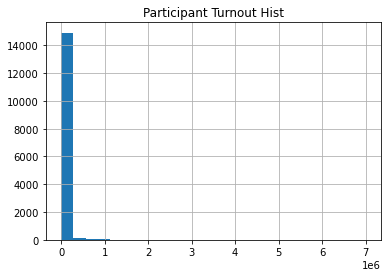

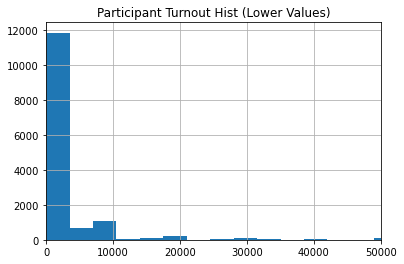

In [335]:
plt.figure()
df.participants_clean.dropna().sort_values().hist(bins=25);
plt.title('Participant Turnout Hist')


plt.figure()
df.participants_clean.dropna().sort_values().hist(bins=2000)
plt.xlim([0, 50000])
plt.title('Participant Turnout Hist (Lower Values)');

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15239 entries, 0 to 17141
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15239 non-null  int64  
 1   country                15239 non-null  object 
 2   ccode                  15239 non-null  int64  
 3   year                   15239 non-null  int64  
 4   region                 15239 non-null  object 
 5   protest                15239 non-null  int64  
 6   protestnumber          15239 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15239 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [350]:
categories_dict

{'50-99': ['50', '99'],
 '100-999': ['100', '999'],
 '2000-4999': ['2000', '4999'],
 '1000-1999': ['1000', '1999'],
 '5000-10000': ['5000', '10000'],
 '>10000': [10001, 1000000000000000]}

In [375]:
def pick_bucket(x):
    if pd.isna(x):
        return np.nan
    
    for key in categories_dict:
        lim_low = categories_dict[key][0]
        lim_hi = categories_dict[key][1]
        
        if (x >= lim_low) and (x <= lim_hi):
            return key
    return np.nan

df['participants_category_clean'] = df.participants_clean.apply(pick_bucket)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15239 entries, 0 to 17141
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15239 non-null  int64  
 1   country                      15239 non-null  object 
 2   ccode                        15239 non-null  int64  
 3   year                         15239 non-null  int64  
 4   region                       15239 non-null  object 
 5   protest                      15239 non-null  int64  
 6   protestnumber                15239 non-null  int64  
 7   startday                     15239 non-null  float64
 8   startmonth                   15239 non-null  float64
 9   startyear                    15239 non-null  float64
 10  endday                       15239 non-null  float64
 11  endmonth                     15239 non-null  float64
 12  endyear                      15239 non-null  float64
 13  protesterviolenc

#### Move on beyond Protester Counts

Next: protesteridentity

In [382]:
# Replace unknowns with np.nan
df.protesteridentity.replace('unspecified', np.nan, inplace=True)

df.protesteridentity.value_counts()

protesters                                                   1541
students                                                      646
workers                                                       273
farmers                                                       219
residents                                                     171
                                                             ... 
anti gay marriage activists                                     1
national council of dockworkers unions of japan                 1
teachers and other government workers                           1
supporters of the people s national congress                    1
farmers and workers belonging to the militant bayan group       1
Name: protesteridentity, Length: 5783, dtype: int64

### Protester Demands

In [386]:
print(df.protesterdemand1.value_counts())
print('-----')
print(df.protesterdemand2.value_counts())
print('-----')
print(df.protesterdemand3.value_counts())
print('-----')
print(df.protesterdemand4.value_counts())

political behavior, process    9680
labor wage dispute             1710
price increases, tax policy    1087
removal of politician          1011
police brutality                825
land farm issue                 467
social restrictions             458
Name: protesterdemand1, dtype: int64
-----
political behavior, process    1004
removal of politician           768
labor wage dispute              438
police brutality                241
price increases, tax policy     214
social restrictions             212
land farm issue                 100
Name: protesterdemand2, dtype: int64
-----
price increases, tax policy    111
removal of politician           94
political behavior, process     63
labor wage dispute              61
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64
-----
.                              744
removal of politician           18
police brutality                 7
political behavio

In [413]:
# Create list of unique demands
demands = np.concatenate([df.protesterdemand1.dropna().unique(), 
                          df.protesterdemand2.dropna().unique(),
                          df.protesterdemand3.dropna().unique(), 
                          df.protesterdemand4.dropna().unique()])
# Verify there are only 7 demands as indicated by data manual
set(demands)

{'labor wage dispute',
 'land farm issue',
 'police brutality',
 'political behavior, process',
 'price increases, tax policy',
 'removal of politician',
 'social restrictions'}

In [414]:
# Replace '.' with np.nan
df.protesterdemand1.replace('.', np.nan, inplace=True)
df.protesterdemand2.replace('.', np.nan, inplace=True)
df.protesterdemand3.replace('.', np.nan, inplace=True)
df.protesterdemand4.replace('.', np.nan, inplace=True)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15239 entries, 0 to 17141
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15239 non-null  int64  
 1   country                      15239 non-null  object 
 2   ccode                        15239 non-null  int64  
 3   year                         15239 non-null  int64  
 4   region                       15239 non-null  object 
 5   protest                      15239 non-null  int64  
 6   protestnumber                15239 non-null  int64  
 7   startday                     15239 non-null  float64
 8   startmonth                   15239 non-null  float64
 9   startyear                    15239 non-null  float64
 10  endday                       15239 non-null  float64
 11  endmonth                     15239 non-null  float64
 12  endyear                      15239 non-null  float64
 13  protesterviolenc

In [419]:
demands = np.unique(demands)

In [423]:
demand_cols = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']
for demand_col in demand_cols:
    temp = df[demand_col]==demands[0]
temp.value_counts()

False    15237
True         2
Name: protesterdemand4, dtype: int64

In [424]:
from sklearn.preprocessing import OneHotEncoder

array([['political behavior, process'],
       ['political behavior, process'],
       ['political behavior, process'],
       ...,
       ['political behavior, process'],
       ['political behavior, process'],
       ['political behavior, process']], dtype=object)

In [488]:
ohe = OneHotEncoder(sparse=False)


for demand_col in demand_cols:
    
    
    if demand_col == demand_cols[0]: #first iteration
        fit = ohe.fit_transform(df[demand_col].values.reshape(-1, 1))
        fit = np.expand_dims(fit, 2)
        
        demand_array = np.array(fit)
        
        
    else:
        
        
        fit = ohe.transform(df[demand_col].values.reshape(-1, 1))
        fit = np.expand_dims(fit, 2)
        
        demand_array = np.concatenate([demand_array, fit], axis=2)
    
demand_array.shape

(15239, 8, 4)

In [510]:
np.logical_or(demand_array[0, 0, :] ==1)

ValueError: invalid number of arguments

In [500]:
np.logical_or(demand_array[0, 0, :], )

ValueError: invalid number of arguments